In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats
from statsmodels.tsa.stattools import pacf # partial autocorrelation 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Autocorrelation function & partial autocorrelation function
from sklearn.ensemble import RandomForestRegressor #modelo random forest
from sklearn.cross_validation import train_test_split # para separar los data sets. 
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.grid_search import GridSearchCV   #Perforing grid search for parameters tuning
from sklearn.feature_selection import RFE #recursive feature selection 

In [2]:
#import Data por industria
file= 'Dataframe_Exportaciones_mensuales_version2.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos.iloc[:,:]

,Pais_comprador,Industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,2000,Enero,45624927.0
1,América Latina,Industrias Manufactureras,2000,Febrero,38402717.0
2,América Latina,Industrias Manufactureras,2000,Marzo,45714515.0
3,América Latina,Industrias Manufactureras,2000,Abril,53314410.0
4,América Latina,Industrias Manufactureras,2000,Mayo,68750896.0
5,América Latina,Industrias Manufactureras,2000,Junio,67485328.0
6,América Latina,Industrias Manufactureras,2000,Julio,62364404.0
7,América Latina,Industrias Manufactureras,2000,Agosto,60669012.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,65432673.0
9,América Latina,Industrias Manufactureras,2000,Octubre,55449279.0


In [8]:
%matplotlib inline

In [4]:
# Data frame de serie mensual total(para rezagos óptimos correctos):

serie_total=datos.groupby(['Año','Mes'],as_index=False,sort=False).sum()
serie_total

,Año,Mes,Monto
0,2000,Enero,8.598118e+08
1,2000,Febrero,7.291364e+08
2,2000,Marzo,9.158368e+08
3,2000,Abril,8.869905e+08
4,2000,Mayo,1.144849e+09
5,2000,Junio,1.224112e+09
6,2000,Julio,1.175645e+09
7,2000,Agosto,1.435631e+09
8,2000,Septiembre,1.501430e+09
9,2000,Octubre,1.434972e+09


In [5]:
Max_lags=12
output_col=2

In [6]:
#funcion para autocorrelacion y autocorrelacion parcial 

def autocorrelation(Data,col_objetivo,max_lags):
    print(plot_acf(Data.iloc[:,col_objetivo], lags=max_lags))
    print(plot_pacf(Data.iloc[:,col_objetivo], lags=max_lags))
    

Figure(480x320)
Figure(480x320)


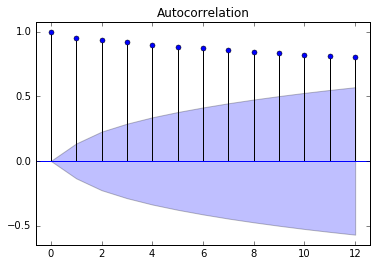

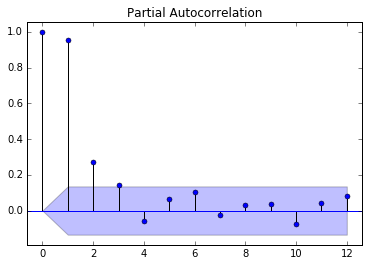

In [9]:
#llamar funcion "autocorrelation" 
autocorrelation(serie_total,output_col,Max_lags)

In [10]:
def is_significant(value, threshold):
        return (value <= -threshold) or (value >= threshold)

def confident_lags(pacf_vector, threshold):
    compare_zip = zip(map(lambda x: is_significant(x, threshold), pacf_vector),
                range(len(pacf_vector)))
    return [val[1] for val in compare_zip if val[0]]

In [19]:
alpha=.05
significance_threshold = stats.norm.ppf(1 - alpha) / np.sqrt(len(serie_total.iloc[:,2])) #aquí tmb se cambia el dataframe y col-objetivo

# funcion para obtener rezagos significativos con un alpha determinado previamente 

def rezagos(Data,col_objetivo,max_lags,significance_threshold):
    pacf_vect = pacf(Data.iloc[:,col_objetivo], nlags=max_lags)
    lags = confident_lags(pacf_vect, significance_threshold)
    return(lags[1:])  # "1" para eliminar el rezago "0"

In [20]:
# mandar llamar la funcion para rezagos significativos
lags=rezagos(serie_total,output_col,Max_lags,significance_threshold)
lags

[1, 2, 3, 6]

In [46]:
# funcion para generar dataframe de rezagos

def generar_rezagos(Data,col_objetivo,max_lags,lags):
    dataframe = pd.DataFrame()
    for i in range(0,max_lags+1,1):
        dataframe['t-'+str(i)] = Data.iloc[:,col_objetivo].shift(i)
    df_rezagos=dataframe.iloc[max(lags):,lags]
    return(df_rezagos)

In [48]:
#mandar llamar funcion para generar DF de los rezagos
output_col=4
df_rezagos=generar_rezagos(datos,output_col,Max_lags,lags)
df_rezagos

,t-1,t-2,t-3,t-6
6,67485328.0,68750896.0,53314410.0,45624927.0
7,62364404.0,67485328.0,68750896.0,38402717.0
8,60669012.0,62364404.0,67485328.0,45714515.0
9,65432673.0,60669012.0,62364404.0,53314410.0
10,55449279.0,65432673.0,60669012.0,68750896.0
11,64030031.0,55449279.0,65432673.0,67485328.0
12,69420372.0,64030031.0,55449279.0,62364404.0
13,60262319.0,69420372.0,64030031.0,60669012.0
14,67522980.0,60262319.0,69420372.0,65432673.0
15,86290892.0,67522980.0,60262319.0,55449279.0


In [49]:
#unir DF de datos originales con DF de rezagos

datanew=datos.iloc[max(lags):,:].join(df_rezagos)
datanew

,Pais_comprador,Industria,Año,Mes,Monto,t-1,t-2,t-3,t-6
6,América Latina,Industrias Manufactureras,2000,Julio,62364404.0,67485328.0,68750896.0,53314410.0,45624927.0
7,América Latina,Industrias Manufactureras,2000,Agosto,60669012.0,62364404.0,67485328.0,68750896.0,38402717.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,65432673.0,60669012.0,62364404.0,67485328.0,45714515.0
9,América Latina,Industrias Manufactureras,2000,Octubre,55449279.0,65432673.0,60669012.0,62364404.0,53314410.0
10,América Latina,Industrias Manufactureras,2000,Noviembre,64030031.0,55449279.0,65432673.0,60669012.0,68750896.0
11,América Latina,Industrias Manufactureras,2000,Diciembre,69420372.0,64030031.0,55449279.0,65432673.0,67485328.0
12,América Latina,Industrias Manufactureras,2001,Enero,60262319.0,69420372.0,64030031.0,55449279.0,62364404.0
13,América Latina,Industrias Manufactureras,2001,Febrero,67522980.0,60262319.0,69420372.0,64030031.0,60669012.0
14,América Latina,Industrias Manufactureras,2001,Marzo,86290892.0,67522980.0,60262319.0,69420372.0,65432673.0
15,América Latina,Industrias Manufactureras,2001,Abril,77937911.0,86290892.0,67522980.0,60262319.0,55449279.0


In [51]:
#funcion para modificiar variables categóricas

def categoricas(Data,tipo):
    if tipo==1: # variables pais comprador e industria se convierten a variables tipo dummie
        
        Data.Mes=Data.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
        Data['Año']=Data['Año'].values.astype(np.float)
        no_dummie=Data.iloc[:,2:]
        temp=pd.get_dummies(Data['Pais_comprador'])
        temp1=pd.get_dummies(Data['Industria'])
        datafinal=temp.join(temp1).join(no_dummie)
        datafinal=datafinal.reset_index(drop=True)
        
    if tipo==2: # variables pais comprador e industria se reemplazan por números 1,2,3....n asignados jerarquicamente por volumen de exportacion.
        Data.Mes=Data.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
        Data['Año']=Data['Año'].values.astype(np.float)
        
        Data.Pais_comprador=Data.Pais_comprador.map({'América Latina':3,'Asia':4,'Europa':2,'Africa':5,'Oceanía':6,'América del Norte':1
                               ,'otros':7})
        Data.Industria=Data.Industria.map({'Industrias Manufactureras':1,'Agricultura y Silvicultura':2,'Servicios y Productos no Clasificados':3
                                           ,'Industrias Extractivas':4,'Ganadería, Apicultura, Caza, Pesca':5})
        datafinal=Data
        
    if tipo==3: # variables pais comprador e industria se reemplazan por el promedio mensual de las exportaciones del segmento(solo conjunto train).
        Data.Mes=Data.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
        Data['Año']=Data['Año'].values.astype(np.float)
        
        data_train=datos.query('Año<2015').reset_index(drop=True) #desde diciembre 2000 hasta 2014 
        datosporindus=data_train.groupby('Industria',as_index=True)['Monto'].mean()
        datosporpais=data_train.groupby('Pais_comprador',as_index=True)['Monto'].mean()
        
        Data.Pais_comprador=Data.Pais_comprador.map({'América Latina':datosporpais['América Latina'],'Asia':datosporpais['Asia']
                                                     ,'Europa':datosporpais['Europa'],'Africa':datosporpais['Africa']
                                                     ,'Oceanía':datosporpais['Oceanía'],'América del Norte':datosporpais['América del Norte']
                                                     ,'otros':datosporpais['otros']})
        Data.Industria=Data.Industria.map({'Industrias Manufactureras':datosporindus['Industrias Manufactureras']
                                           ,'Agricultura y Silvicultura':datosporindus['Agricultura y Silvicultura']
                                           ,'Servicios y Productos no Clasificados':datosporindus['Servicios y Productos no Clasificados']
                                           ,'Industrias Extractivas':datosporindus['Industrias Extractivas']
                                           ,'Ganadería, Apicultura, Caza, Pesca':datosporindus['Ganadería, Apicultura, Caza, Pesca']})
        datafinal=Data
        
    return(datafinal)

In [52]:
#mandar llamar funcion para modificar var categóricas
tipo=3
data_mof=categoricas(datanew,tipo)

In [54]:
data_mof.iloc[:,:]
#convertir Dataframe para modelado a CSV con rezagos óptimos de la serie total
data_mof.to_csv('DataframeExportsparamodelado.csv')

In [ ]:
#funcion para facilitar el modelado 
def modelfit1(algorithm,datos,tipo,printFeatureImportance=True): 
        
    #dividir train,cross y tst
    data_train=datos.query('Año<2015').reset_index(drop=True) #desde diciembre 2000 hasta 2012 
    data_cross=datos.query('(Año==2016 & Mes<8) or (Año<2016 & Año>2014)').reset_index(drop=True) #2013 hasta julio 2016
    data_test=datos.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True) #ultimos 12 meses
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,14:15]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,14:15]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,14:15]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,4:5]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,4:5]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,4:5]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
        
    #Predict cross set:
    dcross_predictions = algorithm.predict(X_cross)
    
    #Predict test set:
    dtest_predictions = algorithm.predict(X_test)
    
    #Print model report:
    print ("\nModel Report")
    print ("Cross mean_squared_error : %.4g" % mean_squared_error(Y_cross.values, dcross_predictions))

    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, dtest_predictions))
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return dtest_predictions,Y_test

In [ ]:
#crear modelo y mandar llamar funcion para modelado

gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
dtest_predictions,Y_test=modelfit1(gbm0,data_mof,tipo)

#variables más importantes para este modelo:t-1,t-5,t-2,año,t-3,t-4,t-6,mes,t-9,t-11,t-10,ind manu
#variables más importantes para este modelo:t-2,t-5,año,t-3,mes,t-6,t-4,ind extractivas, t-9, t-11,t-10,Amer lati

Selected Features:
t-1
t-2
t-3
t-6


C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


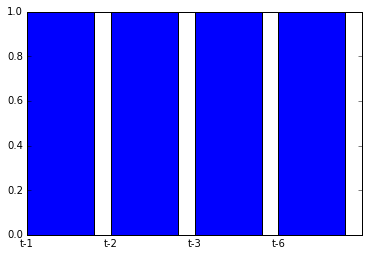

In [36]:
#Recursive Feature Selection (RFE). RFE works by creating predictive models, weighting features, and pruning those 
# with the smallest weights, then repeating the process until a desired number of features are left.

# separate into input and output variables
def sep(data,tipo):
    if tipo==1:
        X = data.iloc[:,15:]
        Y = data.iloc[:,14:15]
    else:
        X = data.iloc[:,5:]
        Y = data.iloc[:,4:5]
    return(X,Y)

X,Y=sep(data_mof,tipo)
# perform feature selection
rfe = RFE(RandomForestRegressor(random_state=1), 6)
fit = rfe.fit(X, Y)
# report selected features
print('Selected Features:')

def fuc_names(data,tipo):
    if tipo==1:
        names = data_mof.columns.values[15:]
    else:
        names = data_mof.columns.values[5:]
    return(names)

names=fuc_names(data_mof,tipo)

for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank

ticks = [i for i in range(len(names))]
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()

In [ ]:
final_lags=[1,2,3,4,5,10,11] #rezagos finales
#mandar llamar funcion para generar DF de los rezagos finales
df_rezagos_finales=generar_rezagos(datos,output_col,Max_lags,final_lags)
df_rezagos_finales.head(15)

In [ ]:
#unir DF de datos originales con DF de rezagos finales

data_fin=datos.iloc[max(final_lags):,:].join(df_rezagos_finales).reset_index(drop=True)
data_fin

In [ ]:
#mandar llamar funcion para modificar var categóricas
data_final=categoricas(data_fin,tipo)

In [ ]:
#convertir Dataframe para modelado a CSV
data_final.to_csv('DataframeExportsparamodelado.csv')

In [ ]:
data_final.iloc[:,:]

In [ ]:
#reiniciar "datanew"
datanew=datos.iloc[max(lags):,:].join(df_rezagos)
data_x=categoricas(datanew,1)

In [ ]:
dtest_predictions

In [ ]:
#Separar resultados segmentado por pais comprador e industria
variables_entrada=datanew.query('Año == 2017 or (Año==2016 & Mes>7)').reset_index(drop=True)
dtest_predictions=pd.DataFrame(dtest_predictions,columns =['Prediccion'])
resultados=variables_entrada.join(dtest_predictions)

### América latina y sus industrias
resultados_AL_IM=resultados.query('Pais_comprador == "América Latina" & Industria == "Industrias Manufactureras"')
resultados_AL_IE=resultados.query('Pais_comprador == "América Latina" & Industria == "Industrias Extractivas"')
resultados_AL_AS=resultados.query('Pais_comprador == "América Latina" & Industria == "Agricultura y Silvicultura"')
resultados_AL_SP=resultados.query('Pais_comprador == "América Latina" & Industria == "Servicios y Productos no Clasificados"')
resultados_AL_GACP=resultados.query('Pais_comprador == "América Latina" & Industria == "Ganadería, Apicultura, Caza, Pesca"')

### Asia y sus industrias
resultados_As_IM=resultados.query('Pais_comprador == "Asia" & Industria == "Industrias Manufactureras"')
resultados_As_IE=resultados.query('Pais_comprador == "Asia" & Industria == "Industrias Extractivas"')
resultados_As_AS=resultados.query('Pais_comprador == "Asia" & Industria == "Agricultura y Silvicultura"')
resultados_As_SP=resultados.query('Pais_comprador == "Asia" & Industria == "Servicios y Productos no Clasificados"')
resultados_As_GACP=resultados.query('Pais_comprador == "Asia" & Industria == "Ganadería, Apicultura, Caza, Pesca"')

### Europa y sus industrias
resultados_Eu_IM=resultados.query('Pais_comprador == "Europa" & Industria == "Industrias Manufactureras"')
resultados_Eu_IE=resultados.query('Pais_comprador == "Europa" & Industria == "Industrias Extractivas"')
resultados_Eu_AS=resultados.query('Pais_comprador == "Europa" & Industria == "Agricultura y Silvicultura"')
resultados_Eu_SP=resultados.query('Pais_comprador == "Europa" & Industria == "Servicios y Productos no Clasificados"')
resultados_Eu_GACP=resultados.query('Pais_comprador == "Europa" & Industria == "Ganadería, Apicultura, Caza, Pesca"')

### Africa y sus industrias
resultados_Af_IM=resultados.query('Pais_comprador == "Africa" & Industria == "Industrias Manufactureras"')
resultados_Af_IE=resultados.query('Pais_comprador == "Africa" & Industria == "Industrias Extractivas"')
resultados_Af_AS=resultados.query('Pais_comprador == "Africa" & Industria == "Agricultura y Silvicultura"')
resultados_Af_SP=resultados.query('Pais_comprador == "Africa" & Industria == "Servicios y Productos no Clasificados"')
resultados_Af_GACP=resultados.query('Pais_comprador == "Africa" & Industria == "Ganadería, Apicultura, Caza, Pesca"')

### Oceanía y sus industrias
resultados_Oc_IM=resultados.query('Pais_comprador == "Oceanía" & Industria == "Industrias Manufactureras"')
resultados_Oc_IE=resultados.query('Pais_comprador == "Oceanía" & Industria == "Industrias Extractivas"')
resultados_Oc_AS=resultados.query('Pais_comprador == "Oceanía" & Industria == "Agricultura y Silvicultura"')
resultados_Oc_SP=resultados.query('Pais_comprador == "Oceanía" & Industria == "Servicios y Productos no Clasificados"')
resultados_Oc_GACP=resultados.query('Pais_comprador == "Oceanía" & Industria == "Ganadería, Apicultura, Caza, Pesca"')

### América del Norte y sus industrias
resultados_AN_IM=resultados.query('Pais_comprador == "América del Norte" & Industria == "Industrias Manufactureras"')
resultados_AN_IE=resultados.query('Pais_comprador == "América del Norte" & Industria == "Industrias Extractivas"')
resultados_AN_AS=resultados.query('Pais_comprador == "América del Norte" & Industria == "Agricultura y Silvicultura"')
resultados_AN_SP=resultados.query('Pais_comprador == "América del Norte" & Industria == "Servicios y Productos no Clasificados"')
resultados_AN_GACP=resultados.query('Pais_comprador == "América del Norte" & Industria == "Ganadería, Apicultura, Caza, Pesca"')

### otros y sus industrias
resultados_Ot_IM=resultados.query('Pais_comprador == "otros" & Industria == "Industrias Manufactureras"')
resultados_Ot_IE=resultados.query('Pais_comprador == "otros" & Industria == "Industrias Extractivas"')
resultados_Ot_AS=resultados.query('Pais_comprador == "otros" & Industria == "Agricultura y Silvicultura"')
resultados_Ot_SP=resultados.query('Pais_comprador == "otros" & Industria == "Servicios y Productos no Clasificados"')
resultados_Ot_GACP=resultados.query('Pais_comprador == "otros" & Industria == "Ganadería, Apicultura, Caza, Pesca"')


In [ ]:
#convertir variables entrada a CSV
variables_entrada.to_csv('DFExportsvarentrada.csv')

In [ ]:
#funcion para graficar resultados segmentado por pais comprador e industria

def graficar_monto_pred(data):
    resultados2=pd.DataFrame(data[['Monto','Prediccion']]).reset_index(drop=True)
    print(resultados2.plot(title='Datos reales vs prediccion',figsize=(14,8)))


In [ ]:
graficar_monto_pred(resultados_AN_IM)

In [ ]:
#porcentaje de error
diferencias_abs=pd.DataFrame(abs(Y_test.values-dtest_predictions.values),columns =['Diferencias'])
sum_diferencias_abs=sum(diferencias_abs)
sum_predicciones=sum(dtest_predictions)
sum_reales=sum(Y_test)
diferencia_total=sum_reales.values-sum_predicciones.values

porcentaje_error=abs(diferencia_total/sum_reales.values) #error de la suma total de todas las predicciones
porcentaje_error_abs=sum_diferencias_abs.values/sum_reales.values #error del monto de cada prediccion 
porcentaje_error_abs

In [ ]:
#cambiar variables dummies a varibles númericas ### completado por tipos 1 ,2 o 3
# cambiar proporcion de conjunto train y cross ## completado ## train hasta 2014 ## seguir explorando 
#sacar error para conjunto cross y errores por segmento #completado papá
# cambiar lo de hacer predicciones con rezagos reales a rezagos con predicciones previas ###completado :) 
